In [1]:
from ndvi_calculation import calculate_area_ndvi, load_dataset, search_catalog, geojson_to_bbox

%load_ext autoreload
%autoreload 2

In [2]:


# Define time range
time_range = ("2023-03-01", "2023-03-31")

# Define bounding box from geojson
bbox = geojson_to_bbox("./boundary/wageningen.geojson")  # Using the Wageningen bbox for now

print(f"Using bounding box: {bbox}")

Using bounding box: [np.float64(5.627249921215224), np.float64(51.954692113668926), np.float64(5.697108014332713), np.float64(51.98931723595351)]


In [3]:
# Search catalog
items = search_catalog(bbox, time_range, max_cloud_cover=80)

2025-08-22 09:50:46,480 - ndvi_calculation - INFO - Found 4 items. Loading data...


In [4]:
# Save the items to a file using built in pystac-client function
items.save_object("items.json")

In [5]:
# Load dataset
# dataset = load_dataset(items, resolution=1000, chunks={'x':5490, 'y': 5490, 'time':30}, groupby="solar_day")
dataset = load_dataset(items, resolution=100, groupby="solar_day")

2025-08-22 09:50:46,602 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:48,196 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:49,604 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:50,155 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:50,705 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:51,243 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:51,596 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:52,153 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2025-08-22 09:50:52,610 - botoco

In [6]:
dataset

<xarray.Dataset> Size: 24MB
Dimensions:      (y: 1099, x: 1098, time: 4)
Coordinates:
  * y            (y) float64 9kB 5.8e+06 5.8e+06 5.8e+06 ... 5.69e+06 5.69e+06
  * x            (x) float64 9kB 6e+05 6.002e+05 ... 7.096e+05 7.098e+05
    spatial_ref  int32 4B 32631
  * time         (time) datetime64[ns] 32B 2023-03-01T10:56:38.230000 ... 202...
Data variables:
    red          (time, y, x) uint16 10MB 0 0 0 0 0 ... 6566 6899 7040 6717 6637
    nir          (time, y, x) uint16 10MB 0 0 0 0 0 ... 6449 6732 6866 6586 6564
    scl          (time, y, x) uint8 5MB 0 0 0 0 0 0 0 0 0 ... 9 9 9 9 9 9 9 9 9

In [7]:
# Calculate NDVI
monthly_max_ndvi = calculate_area_ndvi(dataset)

2025-08-22 09:51:00,008 - ndvi_calculation - INFO - Applying cloud masking...
2025-08-22 09:51:00,039 - ndvi_calculation - INFO - Calculating NDVI...


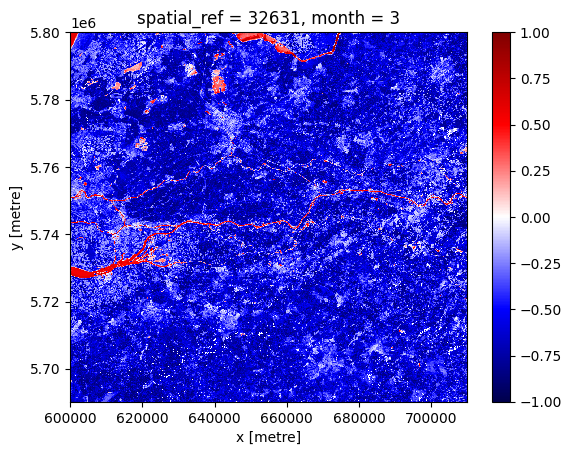

In [8]:
monthly_max_ndvi.plot(robust=True, cmap="seismic", vmin=-1, vmax=1)

In [11]:
# Save as geotiff
monthly_max_ndvi.odc.write_cog("monthly_max_ndvi.tif")

PosixPath('monthly_max_ndvi.tif')